# 이미지에서 특징 감지해서 이미지 분류하기

## 합성곱 신경망 만들기

## 말과 사람을 구별하는 CNN 만들기   


### 이미지 분류 작업
(1) ImageDataGenerator 클래스 사용해서 말/사람 구분 (확인)  
(2) image_dataset_from_directory() 함수 사용해서 말/사람 구분 (확인)  
(3) 이미지 증식    
(4) 이미지 증강     
(5) 이미지 변환   

### 사용하는 이미지 데이터  
- 라벨 없이 말과 사람 이미지를 다운받아서  
- 말은 horse 디렉터리에  
- 사람은 human 디렉터리에 저장 

### 이미지 데이터 준비 
- 1. 이미지 데이터 가져오기 
- 2. 이미지 사이즈 조절 및 색상 조절, 스케일링
- 3. 이미지 증강 및 전처리
- 4. 데이터셋 만들기  

### 이미지 전처리 방법 2가지
- (1) ImageDataGenerator 클래스 사용
- (2) image_dataset_from_directory() 함수 사용 

### (1) ImageDataGenerator 클래스 사용
- 이미지 증강 및 데이터셋 만들기 작업을 한 번에 처리 가능 
- 이미지 증식 및 이미지 변환 작업도 진행 
- image 디렉터리를 지정하면 자동으로 라벨을 생성  
  - 디렉터리의 경로를 알려주면 
    - 디렉터리와 이미지를 모니터링 한 후 
    - 디렉터리내에 들어 있는 이미지에 대해서는 동일한 라벨을 생성함 
    - ex. horse 디렉터리안의 이미지들은 horse라는 타겟값을 생성
- 특정 경로에 있는 이미지들을 데이터셋으로 만들어주는 generator를 생성  
  - 데이터셋을 생성하는 것이 아니라 generator 생성  
- flow_from_directory() 메소드를 사용해서 데이터셋 생성 
   - 이미지를 특정 경로에서 불러와서 numpy array로 만들어주는 함수
   - 폴더  구성 그대로 데이터 처리 (디렉터리 이름을 레이블로 간주. 그 안의 이미지는 해당 레이블의 이미지로 간주)  
   - 특정 경로에 있는 이미지들을 통해 증강된 데이터들의 batches를 생성
   - 준비된 디렉터리를 순환해서 디렉터리명으로 몇개의 클래스가 있는지 확인을 하고 
     -  해당 디렉터리명으로 클래스 생성
    - 이미지 변환 기능도 포함하고 있음
   -  image_dataset_from_directory와 유사 
- flow_from_directory(
  - directory, target_size=(256, 256), color_mode='rgb',   
  - classes=None, class_mode='categorical', batch_size=32,   
  - shuffle=True, seed=None, save_to_dir=None, save_prefix='',   
  - save_format='png', follow_links=False, subset=None, interpolation='nearest')  


### (2) image_dataset_from_directory() 함수
- 해당 디렉토리 안의 이미지 파일들을 dataset 형식 생성  
- image_size 지정 가능하고
- validation_set도 분리 가능
- 이미지 증식  기능은 없음 


In [ ]:
#############################################################

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 이미지 데이터 준비
- 구글이 제공하는 이미지셋 다운로드 받아서 사용  
- 구글 api가 제공하는 horse-or-human.zip을 사용
- https://storage.googleapis.com/learning-datasets/horse-or-human.zip  
- 분류 시 **동일 분류의 이미지는 같은 폴더에 저장** 해야 함


In [2]:
import urllib.request # api 요청 패키지
import zipfile # 압축파일 관련 라이브러리

In [18]:
# 한번 실행하면 다운 완료되므로 재실행 할 필요 없음 - 다운로드 후 주석처리
# 구글이 제공하는 이미지셋 활용
url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'

# 이미지셋 다운로드
urllib.request.urlretrieve(url, file_name)

# 현재 폴더에 horse-or-human.zip 파일 다운로드 되었는지 확인

('horse-or-human.zip', <http.client.HTTPMessage at 0x1d00a0884a0>)

In [19]:
# 압축 해제 수행 - 압축 해제 수행 후 주석처리
zip_ref = zipfile.ZipFile(file_name, 'r') # 압축객체 생성
zip_ref.extractall(training_dir)
zip_ref.close()

# 폴더 열어서 이미지 확인
# training 폴더 / 그 안에 horses / humans 폴더 들어 있음
# horses 폴더 : 500개 이미지 파일
# humans 폴더 : 527개 이미지 파일 

In [4]:
training_dir = 'horse-or-human/training/'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Found 1027 images belonging to 2 classes.


In [6]:
# 데이터 확인 
for x_data, y_data in train_generator:
    print(x_data.shape)  # (32, 100, 100, 3)
    print(y_data.shape)  # (32,)
    print(x_data[0])
    print(y_data[:5])    # [1. 1. 1. 0. 1.]
    break

(32, 100, 100, 3)
(32,)
[[[0.83921576 0.79215693 0.72156864]
  [0.8117648  0.7607844  0.69411767]
  [0.7490196  0.69411767 0.62352943]
  ...
  [0.4784314  0.4431373  0.3921569 ]
  [0.6039216  0.56078434 0.5019608 ]
  [0.5686275  0.5254902  0.4666667 ]]

 [[0.7607844  0.7137255  0.6431373 ]
  [0.7490196  0.7058824  0.63529414]
  [0.6784314  0.63529414 0.5686275 ]
  ...
  [0.7803922  0.7372549  0.67058825]
  [0.654902   0.60784316 0.54509807]
  [0.54509807 0.50980395 0.45098042]]

 [[0.6784314  0.6313726  0.5647059 ]
  [0.7176471  0.6745098  0.60784316]
  [0.78823537 0.74509805 0.6745098 ]
  ...
  [0.6784314  0.6313726  0.5647059 ]
  [0.7411765  0.69803923 0.627451  ]
  [0.78823537 0.7372549  0.67058825]]

 ...

 [[0.6627451  0.6156863  0.5529412 ]
  [0.7568628  0.7137255  0.6392157 ]
  [0.7960785  0.7490196  0.6784314 ]
  ...
  [0.654902   0.60784316 0.5411765 ]
  [0.5882353  0.54509807 0.48627454]
  [0.42352945 0.38431376 0.33333334]]

 [[0.70980394 0.6627451  0.5921569 ]
  [0.73333335

### 말-사람 데이터셋을 위한 CNN 구조

### CNN 모델의 층 구성
- 층의 수가  정해져있지는 않음 
- 보통 입력층-합성곱층(원하는만큼)-flatten-밀집층-규제-밀집출력층
- 합성곱층의 필터 수는 
    - 16부터 시작해서 또는 16의 배수로 시작해서 뒤의 층으로 갈수로 16의 배수만큼 늘리는게 일반적
        - 16, 32, 64, 128 순으로 필터수를 결정
- 층을 변경해서 가장 적합한 모델을 만드는 것이 합성곱 또는 신경망계열 알고리즘의 튜닝

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling

In [ ]:
# (1) 모델 구성



In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 38416)             0         
                                                                 
 dense (Dense)               (None, 512)               19669504  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 19670465 (75.04 MB)
Trainable params: 19670465 (75.04 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [6]:
# (2) 컴파일
from tensorflow.keras.optimizers import RMSprop



### 검증 데이터 준비

In [7]:
import urllib.request # api 요청 패키지
import zipfile # 압축파일 관련 라이브러리

In [26]:
# 검증데이터 다운로드 : 1번만 실행 - 실행 후 주석 처리 
# validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"

# validation_file_name = "validation-horse-or-human.zip"
# validation_dir = 'horse-or-human/validation/'
# urllib.request.urlretrieve(validation_url, validation_file_name)

# 압축 해제 
# zip_ref = zipfile.ZipFile(validation_file_name, 'r')
# zip_ref.extractall(validation_dir)
# zip_ref.close()

# 폴더 및 파일 확인

('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x16993a02dd0>)

In [11]:
validation_dir = 'horse-or-human/validation/'

In [ ]:
# 검증 데이터 전처리 



Found 256 images belonging to 2 classes.


In [13]:
# 데이터 확인 
for x_data, y_data in val_generator:
    print(x_data.shape)  # (32, 100, 100, 3)
    print(y_data.shape)  # (32,)
    print(x_data[0])
    print(y_data[:5])    # [0. 0. 1. 1. 0.]
    break

(32, 100, 100, 3)
(32,)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[0. 0. 1. 0. 1.]


In [ ]:
# (3) 모델 학습 
# 검증 데이터 포함해서 학습


Epoch 1/15


33/33 [==============================] - 8s 204ms/step - loss: 1.1528 - accuracy: 0.7089 - val_loss: 0.4574 - val_accuracy: 0.7812
Epoch 2/15
33/33 [==============================] - 6s 172ms/step - loss: 0.1820 - accuracy: 0.9503 - val_loss: 1.3073 - val_accuracy: 0.6094
Epoch 3/15
33/33 [==============================] - 6s 172ms/step - loss: 0.0926 - accuracy: 0.9737 - val_loss: 1.6028 - val_accuracy: 0.6250
Epoch 4/15
33/33 [==============================] - 6s 175ms/step - loss: 0.0601 - accuracy: 0.9796 - val_loss: 1.1679 - val_accuracy: 0.7461
Epoch 5/15
33/33 [==============================] - 6s 176ms/step - loss: 0.0245 - accuracy: 0.9942 - val_loss: 1.3806 - val_accuracy: 0.7461
Epoch 6/15
33/33 [==============================] - 6s 179ms/step - loss: 0.0244 - accuracy: 0.9951 - val_loss: 1.6405 - val_accuracy: 0.7422
Epoch 7/15
33/33 [==============================] - 6s 185ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.7784 - val_accuracy: 0.7500
Epoc

In [15]:
loss, accuracy = model.evaluate(val_generator)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}') 

# 정확도: 0.7656, 손실: 2.0295
# val_loss: 2.0295 - val_accuracy: 0.7656

8/8 [==============================] - 1s 68ms/step - loss: 2.0295 - accuracy: 0.7656
정확도: 0.7656, 손실: 2.0295


### 모델 실행하기

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [9]:
# 테스트용 이미지로 모델 테스트 
# image 폴더 생성해서 3개 저장
# test_image_1.jpg, ...
import sys
sample_images = ['./image/test_image_{}.jpg'.format(i) for i in range(1, 4)]


In [17]:
sample_images

['./image/test_image_1.jpg',
 './image/test_image_2.jpg',
 './image/test_image_3.jpg']

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

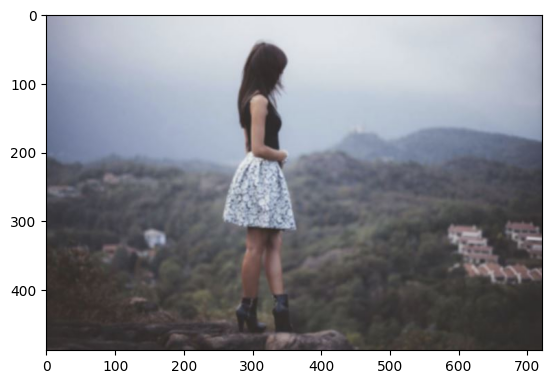

In [19]:
# 이미지 출력해서 확인
plt.imshow(mpimg.imread(sample_images[0]))
plt.show()

In [20]:
import tensorflow as tf
import numpy as np

### np.expand_dims() 함수 
- 배열의 차원 확장
- 주로 딥러닝에서 다차원 배열 다룰 때 사용
- 특히 텐서의 차원을 조정할 때 자주 사용
- np.expand_dims(arr, axis)
  - arr :차원을 확장할 배열
  - axis :새로 추가될 차원의 위치
      - 정수 또는 튜플 형태로 지정
      - 디폴트 : 0 (첫 번째 차원, 즉 인덱스 0 앞에 새로운 차원을 추가하겠다는 의미)   

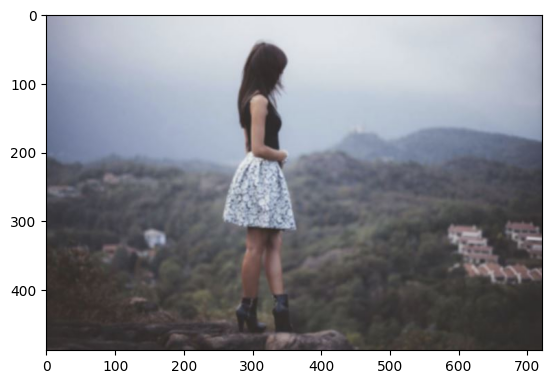

1/1 [==============================] - 0s 21ms/step
classes :  [[1.]]
클래스(레이블) 출력 :  1.0
./image/test_image_1.jpg는 사람입니다.


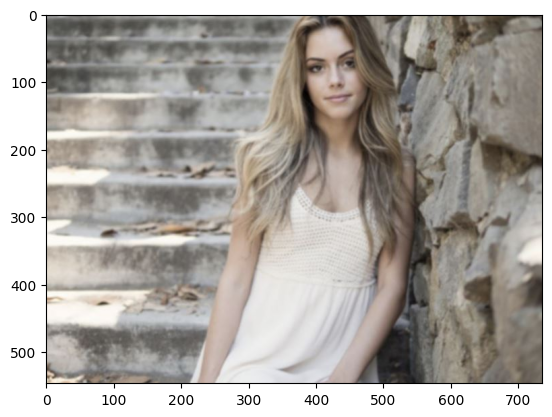

1/1 [==============================] - 0s 21ms/step
classes :  [[0.]]
클래스(레이블) 출력 :  0.0
./image/test_image_2.jpg는 말입니다.


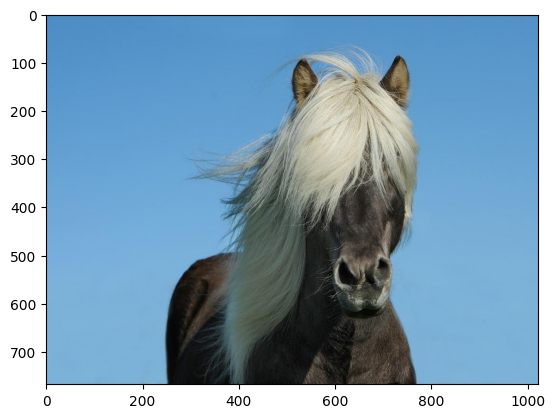

1/1 [==============================] - 0s 23ms/step
classes :  [[0.]]
클래스(레이블) 출력 :  0.0
./image/test_image_3.jpg는 말입니다.


In [ ]:
# 잘 예측하는지 확인
for n in sample_images:
 

## (2) image_dataset_from_directory 사용하기

### image_dataset_from_directory() vs flow_from_directory()
- 포함 라이브러리가 다름
- tf.keras.utils.image_dataset_from_directory()
    - 디렉터리의 이미지 파일에서 tf.data.Dataset 생성  
    - 이미지에 대한 라벨링을 진행   
- ImageDataGenerator.flow_from_directory()
    - tensorflow.keras.preprocessing.image에 포함된 ImageDataGenerator
    - 디렉터리에 대한 경로를 가져오고 증강 데이터 배치 생성
    - 이미지 증식 가능  

In [14]:
training_dir = 'horse-or-human/training/'
val_dir = 'horse-or-human/training/'

In [16]:
# image_dataset_from_directory() 사용해서 데이터셋 생성

train_ds = tf.keras.utils.image_dataset_from_directory(
    training_dir,
    image_size=(300, 300),
    label_mode="binary"
) 
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(300, 300),
    label_mode="binary"
) 
# Found 1027 files belonging to 2 classes.

NotFoundError: Could not find directory horse-or-human/training/

In [15]:
import tensorflow as tf

In [13]:
# 데이터 확인
for x_data, y_data in train_ds:
    print(x_data.shape)
    print(y_data.shape)
    print(x_data[0])
    print(y_data[:5])
    break

NameError: name 'train_ds' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling

In [ ]:
# 모델 구성
model2 = Sequential()
model2.add(Rescaling(1/255), input_shape=(100, 100, 3)) # 입력층 구성 + 스케일링 변환도 같이
model2.add(Conv2D(16, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# 컴파일 
model2.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [ ]:
# 학습 : 검증 데이터 포함
# 검증 데이터 포함 학습
model2.fit(train_df,
           epochs=15,
           validation_data=

Epoch 1/15
33/33 [==============================] - 4s 100ms/step - loss: 0.9386 - accuracy: 0.7303 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 2/15
33/33 [==============================] - 3s 93ms/step - loss: 0.1151 - accuracy: 0.9718 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 3/15
33/33 [==============================] - 3s 97ms/step - loss: 0.0448 - accuracy: 0.9903 - val_loss: 0.8505 - val_accuracy: 0.5000
Epoch 4/15
33/33 [==============================] - 3s 95ms/step - loss: 0.0262 - accuracy: 0.9942 - val_loss: 0.7288 - val_accuracy: 0.5000
Epoch 5/15
33/33 [==============================] - 3s 95ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 1.5704 - val_accuracy: 0.5000
Epoch 6/15
33/33 [==============================] - 4s 106ms/step - loss: 0.0539 - accuracy: 0.9815 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 7/15
33/33 [==============================] - 3s 99ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.8144 - val_accuracy: 0.5000
Epoch 8/15


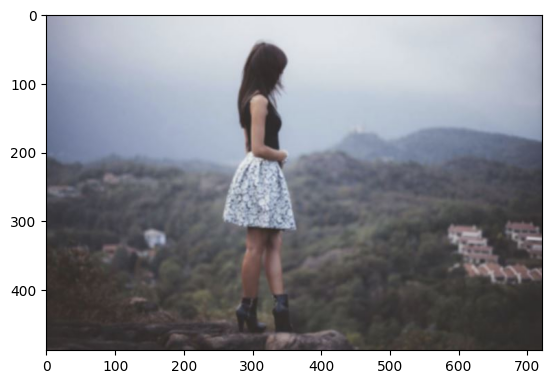

1/1 [==============================] - 0s 54ms/step
[[0.98257166]]
클래스(레이블) 예측 확률 출력 :  0.98257166
./image/test_image_1.jpg는 사람입니다.


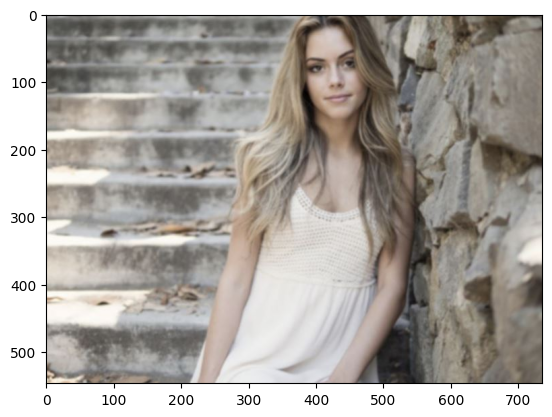

1/1 [==============================] - 0s 19ms/step
[[0.01932559]]
클래스(레이블) 예측 확률 출력 :  0.01932559
./image/test_image_2.jpg는 말입니다.


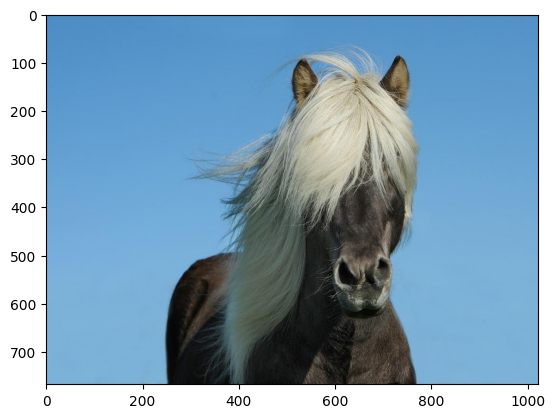

1/1 [==============================] - 0s 20ms/step
[[0.00037497]]
클래스(레이블) 예측 확률 출력 :  0.00037497305
./image/test_image_3.jpg는 말입니다.


In [31]:
# 테스트 이미지로 예측 

# 잘 예측하는지 확인
for n in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(n))
    plt.show()
    
    # 이미지 처리
    img = tf.keras.utils.load_img(n, target_size=(100, 100))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0) # (1, 100, 100, 3)
    
    # 클래스 예측
    classes = model2.predict(x)
    print(classes)
    
    print('클래스(레이블) 예측 확률 출력 : ', classes[0][0])
    if classes[0][0] > 0.5:
        print(n + "는 사람입니다.")
    else:
        print(n + "는 말입니다.")
        
    print('=============================================')

## 이미지 증식

### 증강 vs 증식
- CNN모델의 성능을 높이고 과적합을 방지하는 가장 좋은 방법
    - 이미지 데이터 양을 늘리거나 이미지의 다양한 유형을 학습하게 하는 방법
- 이미지(데이터) 증식 : 원본이미지(원본데이터)를 이용해서 변형된 이미지(데이터) 개수를 늘리는 것
    - 학습이미지 수가 늘어나게 됨
    - 증식을 이용하려면 증강(변화)된 이미지를 저장해서 사용
- 이미지(데이터) 증강 : 학습이미지의 개수를 늘리는 것이 아니고 
    - 학습 시 마다 개별 원본이미지를 변형해서 학습을 진행하는 기법
    - 이미지 개수를 늘리지 않고도 여러 유형의 이미지를 학습할 수 있게 해주는 방법

### 이미지 증식
- 이미지 파일 새로 생성됨 
- 데이터 개수가 늘어남   

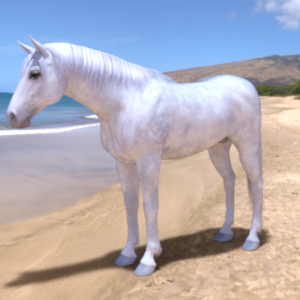

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img


In [ ]:
aug_gen = ImageDataGenerator(

)

# rescale
# horizontal_flip : 좌우반전
# vertical_flip : 상하반전
# rotation_range : 회전
# zoom_range : 확대 혹은 축소
# width_shift_range, height_shift_range : 이동
# shear_range : 눕히기
# brightness_range(min, max) : 밝기 조절
# channel_shift_range : RGB 픽셀 값을 변경
# fill_mode : 회전 축소 등으로 이미지에 여백이 생겼을때 채우는 방법. nearest :가장 가까운 픽셀로 채움

In [ ]:
# 이미지 증식 : ImageDataGenerator 클ㄹ스의 flow() 사용
# flow() 사용 : 증식된 이미지 반환



### 이미지 증강
- 실제 이미지 수를 늘리는것이 아니라
- 학습 시 원본 이미지 변형된 이미지로 학습 진행 

In [46]:
# 모델 생성

model3 = Sequential()

model3.add(Conv2D(16, (3,3), input_shape=(100, 100, 3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(32, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# 컴파일 
model3.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [ ]:
## 이미지 증강은 학습데이터에 대해서만 진행
# 객체 생성
train_datagen = ImageDataGenerator(
    
)

In [ ]:
train_generator = train_datagen.flow_from_directory(

)

Found 1027 images belonging to 2 classes.


Epoch 1/15
33/33 [==============================] - 7s 199ms/step - loss: 0.6936 - accuracy: 0.5141 - val_loss: 0.6805 - val_accuracy: 0.5625
Epoch 2/15
33/33 [==============================] - 6s 190ms/step - loss: 0.6822 - accuracy: 0.5784 - val_loss: 0.6217 - val_accuracy: 0.8164
Epoch 3/15
33/33 [==============================] - 7s 203ms/step - loss: 0.6033 - accuracy: 0.6933 - val_loss: 0.6464 - val_accuracy: 0.5391
Epoch 4/15
33/33 [==============================] - 7s 214ms/step - loss: 0.5216 - accuracy: 0.7352 - val_loss: 0.4623 - val_accuracy: 0.7461
Epoch 5/15
33/33 [==============================] - 7s 215ms/step - loss: 0.4558 - accuracy: 0.7965 - val_loss: 0.3836 - val_accuracy: 0.8555
Epoch 6/15
33/33 [==============================] - 7s 211ms/step - loss: 0.4240 - accuracy: 0.8189 - val_loss: 1.1525 - val_accuracy: 0.6133
Epoch 7/15
33/33 [==============================] - 7s 208ms/step - loss: 0.3444 - accuracy: 0.8569 - val_loss: 0.5173 - val_accuracy: 0.8438
Epoch 

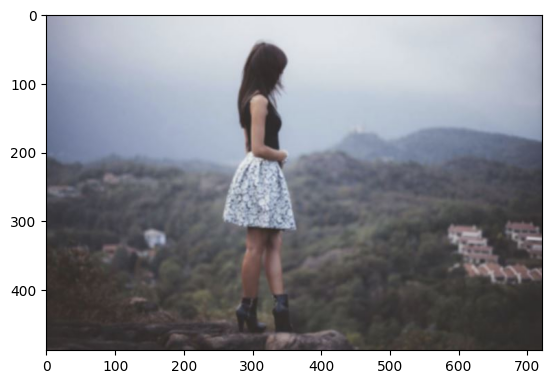

1/1 [==============================] - 0s 81ms/step
[[1.]]
클래스(레이블) 출력 :  1.0
./image/test_image_1.jpg는 사람입니다.


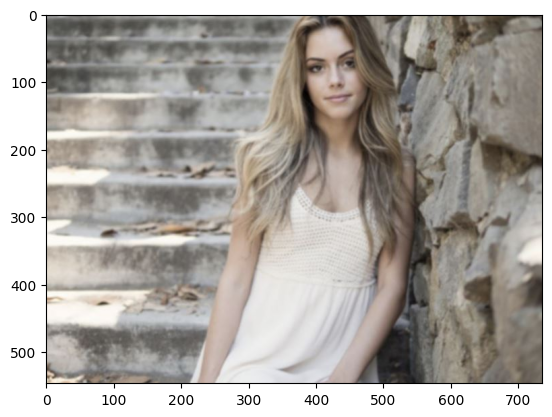

1/1 [==============================] - 0s 20ms/step
[[1.]]
클래스(레이블) 출력 :  1.0
./image/test_image_2.jpg는 사람입니다.


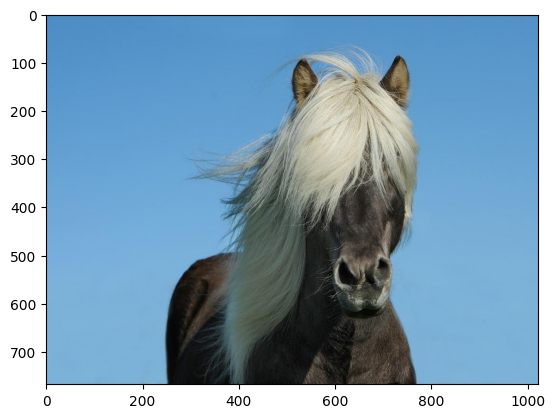

1/1 [==============================] - 0s 18ms/step
[[0.]]
클래스(레이블) 출력 :  0.0
./image/test_image_3.jpg는 말입니다.


In [50]:
# 테스트 이미지로 예측 

# 잘 예측하는지 확인
for n in sample_images:
    # 이미지 출력
    plt.imshow(mpimg.imread(n))
    plt.show()
    
    # 이미지 처리
    img = tf.keras.utils.load_img(n, target_size=(100, 100))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0) # (1, 100, 100, 3)
    
    # 클래스 예측
    classes = model3.predict(x)
    print(classes)
    
    print('클래스(레이블) 출력 : ', classes[0][0])
    if classes[0][0] > 0.5:
        print(n + "는 사람입니다.")
    else:
        print(n + "는 말입니다.")
        
    print('=============================================')